Veremos agora como nosso modelo está se comportando ao se deparar com dados nunca vistos.

Lembrando que o dataset que usamos pra treino é de apenas 10 imagens e o Keras não é o melhor modelo recomendado para fazer detecção de objetos.

In [106]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

Importando o melhor modelo

In [107]:
best_model = keras.models.load_model('car_detection_model_best.keras')

Pré processando a imagem de teste antes de enviar ao modelo

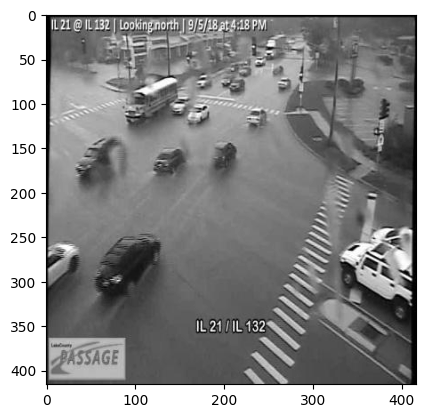

In [108]:
img_path = 'test_images/carros_01.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

In [109]:
original_h, original_w = img.shape

resized_img = cv2.resize(img, (128,128),
                         interpolation=cv2.INTER_LANCZOS4)

# Redimensionando a imagem para ter (128,128,1) como o modelo espera
resized_img = np.expand_dims(resized_img, axis=-1)

# Normaliza a imagem para o intervalo [0, 1] como foi feito no treinamento
resized_img = resized_img / 255.0

# A forma esperada pelo modelo é (1, 128, 128, 1), ou seja, um "lote" de uma imagem
# A função abaixo é usada para adicionar a dimensão do lote
resized_img = np.expand_dims(resized_img, axis=0)

predicted_boxes = best_model.predict(resized_img)

# Aqui a predição tem o formato (1, 5*4), então precisamos separá-lo
predicted_boxes = predicted_boxes.reshape(-1, 4)
predicted_boxes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[53.535664 , 63.3366   , 15.851946 , 20.769083 ],
       [76.1379   , 59.956562 , 12.937107 , 14.450117 ],
       [65.1699   , 42.207016 , 12.854615 , 10.88086  ],
       [79.14     , 34.61427  , 11.149695 , 15.370013 ],
       [78.6895   , 34.73211  ,  6.8671865, 10.473125 ]], dtype=float32)

**Reverter as coordenadas das caixas para o tamanho original da imagem**

In [110]:
scaled_boxes = []
for box in predicted_boxes:
    x, y, w, h = box

    x = x * original_w / 128
    y = y * original_h / 128
    w = w * original_w / 128
    h = h * original_h / 128
    
    scaled_boxes.append([x, y, w, h])

scaled_boxes

[[173.99090671539307,
  205.8439540863037,
  51.518824100494385,
  67.49951982498169],
 [247.44817924499512,
  194.85882663726807,
  42.04559803009033,
  46.96288061141968],
 [211.80217170715332,
  137.17280197143555,
  41.77749943733215,
  35.36279606819153],
 [257.2049980163574,
  112.49637508392334,
  36.236510038375854,
  49.95254302024841],
 [255.74087142944336,
  112.87935447692871,
  22.31835627555847,
  34.037657737731934]]

In [111]:
def draw_boxes(img, boxes):
    for box in boxes:
        x, y, w, h = box

        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)),
                      color=(255,255,0),
                      thickness=4)
    
    return img

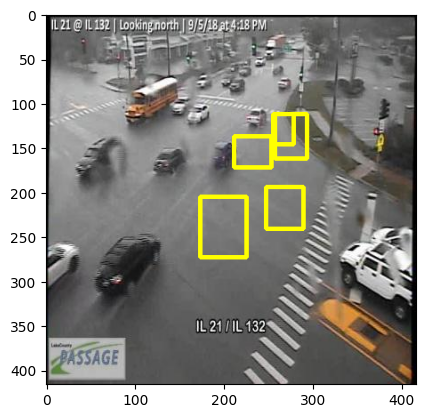

In [112]:
output_img = cv2.imread(img_path)
output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

output_img = draw_boxes(output_img, scaled_boxes)

plt.imshow(output_img)